In [39]:
import os 
from  pathlib import Path 
from glob import glob
import pandas as pd 

import cv2 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False 

print(f"OpenCV version    : {cv2.__version__}")
print(f"matplotlib version: {mpl.__version__}")

OpenCV version    : 4.12.0
matplotlib version: 3.10.5


In [40]:
# 여러 장의 이미지를 한 줄에 시각화하기 위한 함수 정의
from typing import List 

def show_image(img_list:List[np.array], title_list: List[str], cmaps=None, suptitle=None, suptitle_top=1., ax_off=False, pad=10, fontsize=10, super_fontsize=15):
    
    fig, axes = plt.subplots(1,len(img_list), figsize=(len(img_list)*3,3))
    cmaps = [cmaps]*len(img_list) if cmaps is None else cmaps
    
    for i, ax in enumerate(axes):
        if img_list[i].dtype == np.uint8:
            ax.imshow(img_list[i], cmap=cmaps[i], vmin=0, vmax=255)
        else:
            ax.imshow(img_list[i], cmap=cmaps[i])
        ax.set_title(f"{title_list[i]}\n", pad=pad, fontsize=fontsize)
        ax.text(0.5, 1.0, f"{img_list[i].shape}\n({type(img_list[i]).__name__}:{img_list[i].dtype})", fontsize=9, ha='center', va='bottom', transform=ax.transAxes)
        print(f"{title_list[i]} 값 범위: {img_list[i].min()} ~ {img_list[i].max()}")
        if ax_off:
            ax.axis('off')
    
    if suptitle:        
        fig.subplots_adjust(top=suptitle_top)
        fig.suptitle(suptitle, fontsize=super_fontsize)
    plt.show();

# opencv 기본

## cv2.imread() 옵션 

1. cv2.IMREAD_COLOR         : 컬러 이미지로 읽어오기. 투명 채널은 있어도 무시됨.
    - cv2.IMREAD_COLOR_BGR 
    - cv2.IMREAD_COLOR_RGB
    
2. cv2.IMREAD_GRAYSCALE     : 흑백 이미지로 읽어오기
3. cv2.IMREAD_UNCHANGED     : 컬러 이미지에 투명 채널이 있다면 투명 채널까지 포함

img_default.shape  : (951, 714, 3)
img_color.shape    : (951, 714, 3)
img_unchanged.shape: (951, 714, 4)
img_default 값 범위: 0 ~ 255
img_color 값 범위: 0 ~ 255
img_color_rgb 값 범위: 0 ~ 255
img_unchanged 값 범위: 0 ~ 255
img_rgba 값 범위: 0 ~ 255


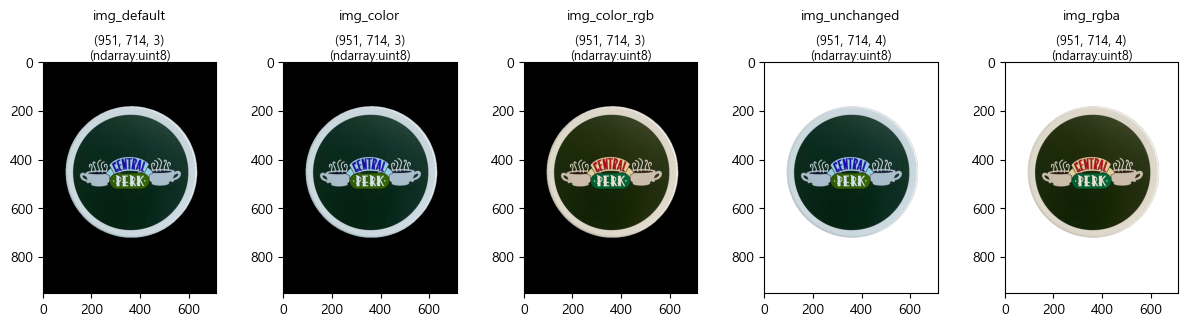

In [ ]:
import cv2 
import matplotlib.pyplot as plt 

# <a href="https://pixabay.com/ko//?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=3478373">Pixabay</a>로부터 입수된 <a href="https://pixabay.com/ko/users/agzam-7990144/?utm_source=link-attribution&utm_medium=referral&utm_campaign=image&utm_content=3478373">Агзам Гайсин</a>님의 이미지 입니다.
img_file = "coasters_trans.png" 

img_default = cv2.imread(img_file)                          # 기본 옵션으로 읽어오기
img_color = cv2.imread(img_file, cv2.IMREAD_COLOR)          # BGR 컬러 순서로 읽어오기 (투명 채널이 있어도 무시됨)
img_color_rgb = cv2.imread(img_file, cv2.IMREAD_COLOR_RGB)  # RGB 컬러 순서로 읽어오기 (투명 채널이 있어도 무시됨)
img_unchanged = cv2.imread(img_file, cv2.IMREAD_UNCHANGED)  # 투명 채널이 있다면 투명 채널도 무시하지 않고 가져오기 (채널 순서: BGRA)
img_rgba = cv2.cvtColor(img_unchanged, cv2.COLOR_BGRA2RGBA) # 투명 채널이 있는 BGRA 이미지를 RGBA 이미지로 변환

print(f"img_default.shape  : {img_default.shape}")
print(f"img_color.shape    : {img_color.shape}")
print(f"img_unchanged.shape: {img_unchanged.shape}")


show_image([img_default, img_color, img_color_rgb, img_unchanged, img_rgba], ['img_default', 'img_color', 'img_color_rgb','img_unchanged', 'img_rgba'], pad=20)

# 윤곽선 추출

- Canny edge detection

- Laplacian edge detection

- Sobel edge detection

original image size: (375, 500)
resized image size : (512, 512)


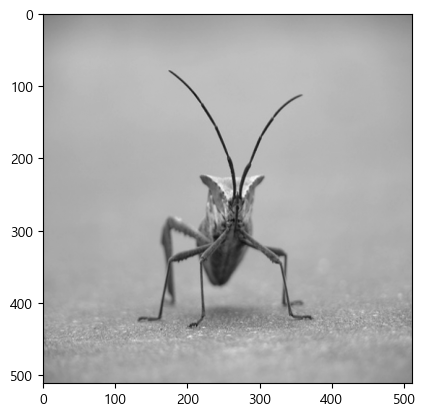

In [3]:
#img_file = 'lena.png'
#img_file = 'jj.jpg'
img_file = 'stinkbug.png'

org_img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
org_img_size = org_img.shape
print(f"original image size: {org_img_size}")

img_size = (512,512)
img = cv2.resize(org_img, img_size, interpolation=cv2.INTER_LINEAR)  # cv2.INTER_LINEAR
print(f"resized image size : {img.shape}")

plt.imshow(img, cmap='gray');

img 값 범위: 3 ~ 209
blurred 값 범위: 25 ~ 196


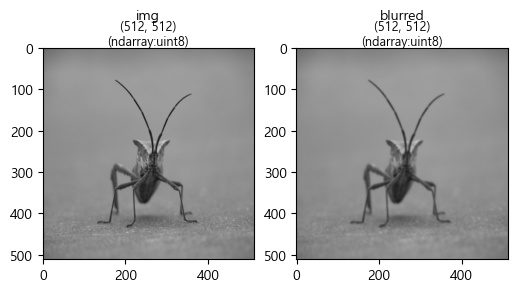

In [ ]:
# 노이즈 제거를 위한 가우시안 블러 적용
kernel_size = (7,7)

# 이미지에 있는 작은 노이즈는 에지 검출을 방해할 수 있으므로 Gaussian Blur를 적용해 전체적으로 이미지가 부드러워지도록 전처리함.
blurred = cv2.GaussianBlur(img, ksize=kernel_size, sigmaX=0)  # 가우시안 커널의 x축 방향(가로 방향)으로의 블러링 강도 조절. sigmX값이 클수록 블러징 정도가 강해짐.

imgs = [img, blurred]
titles = ['img', 'blurred']
cmaps = ['gray', 'gray']
show_image(imgs, titles, cmaps)

In [5]:
cannys, canny_titles   = [], []
laplacians, lap_titles = [], []
sobels, sobel_titles   = [], []

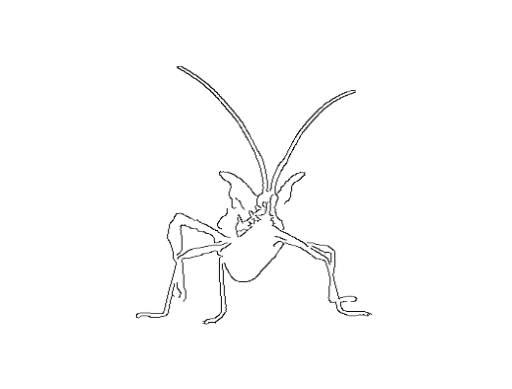

In [6]:
# Canny edge 검출 (가장 일반적인 방법)
canny_thr1 = 60
canny_thr2 = 125
edges_canny = cv2.Canny(blurred, threshold1=canny_thr1, threshold2=canny_thr2)
edges_canny = cv2.resize(edges_canny, (org_img_size[1], org_img_size[0]))

cannys.append(edges_canny)
canny_titles.append('blurred')

plt.imshow(edges_canny, cmap='gray_r')
plt.axis('off');

median: 132.0
lower : 88, upper : 175
equalizedHist 값 범위: 0 ~ 255
equalizedHist_edges_canny 값 범위: 0 ~ 255


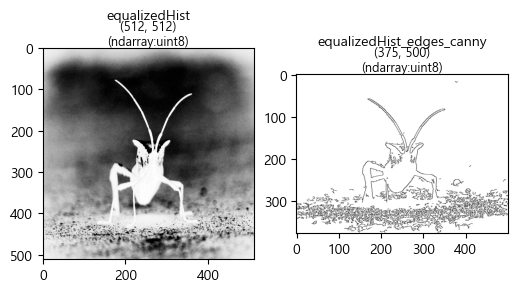

In [7]:
# 히스토그램 평활화로 대비 개선  
enhanced = cv2.equalizeHist(img)  # 이미지 전체에 대한 평활화

# 적응형 임계값을 사용한 Canny
v = np.median(enhanced)
print(f"median: {v}")
lower = int(max(0, (1.0 - 0.33) * v))   # 중앙값의 2/3 정도를 하한선으로 설정하되, 값이 0보다 작아지는 것을 방지하기 위해 max()함수 사용
upper = int(min(255, (1.0 + 0.33) * v)) # 중앙값보다 1/3배 큰 값을 상한선으로 설정하되, 값이 255보다 커지는 것을 방지하기 위해 min()함수 사용
print(f"lower : {lower}, upper : {upper}")
enhanced_edges_canny = cv2.Canny(enhanced, lower, upper)

enhanced_edges_canny = cv2.resize(enhanced_edges_canny, (org_img_size[1], org_img_size[0]))

cannys.append(enhanced_edges_canny)
canny_titles.append('enhanced by cv2.equalizeHist()')


show_image([enhanced, enhanced_edges_canny], ['equalizedHist', 'equalizedHist_edges_canny'], ['gray_r']*2)


median: 150.0
lower : 100, upper : 199
clahe 값 범위: 4 ~ 231
clahe_edges_canny 값 범위: 0 ~ 255


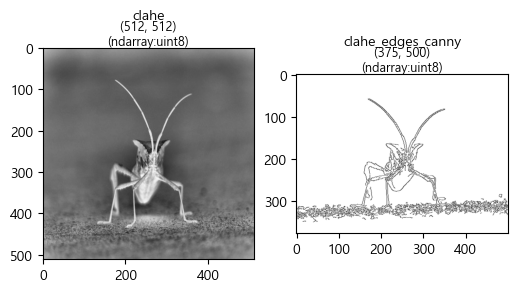

In [8]:
# 히스토그램 평활화로 대비 개선 (일정한 크기의 tile로 나누고, tile 단위로 평활화)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced = clahe.apply(img)

#enhanced = cv2.equalizeHist(img)  # 이미지 전체에 대한 평활화

# 적응형 임계값을 사용한 Canny
v = np.median(enhanced)
print(f"median: {v}")
lower = int(max(0, (1.0 - 0.33) * v))   # 중앙값의 2/3 정도를 하한선으로 설정하되, 값이 0보다 작아지는 것을 방지하기 위해 max()함수 사용
upper = int(min(255, (1.0 + 0.33) * v)) # 중앙값보다 1/3배 큰 값을 상한선으로 설정하되, 값이 255보다 커지는 것을 방지하기 위해 min()함수 사용
print(f"lower : {lower}, upper : {upper}")
enhanced_edges_canny = cv2.Canny(enhanced, lower, upper)

enhanced_edges_canny = cv2.resize(enhanced_edges_canny, (org_img_size[1], org_img_size[0]))

cannys.append(enhanced_edges_canny)
canny_titles.append('clahe enhanced')


show_image([enhanced, enhanced_edges_canny], ['clahe', 'clahe_edges_canny'], ['gray_r']*2)


bilateral 값 범위: 28 ~ 190
edges_canny_b 값 범위: 0 ~ 255


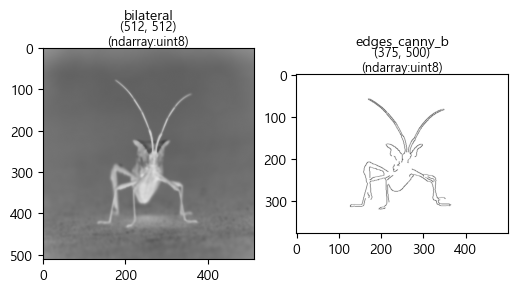

In [9]:
# 양방향 필터로 노이즈 제거하면서 Canny edge 추출

bilateral = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

edges_canny_b = cv2.Canny(bilateral, threshold1=canny_thr1, threshold2=canny_thr2)

edges_canny_b = cv2.resize(edges_canny_b, (org_img_size[1], org_img_size[0]))

cannys.append(edges_canny_b)
canny_titles.append('bilateralFilter')

show_image([bilateral, edges_canny_b], ['bilateral', 'edges_canny_b'], ['gray_r']*2)


edges_canny 값 범위: 0 ~ 255
dilated 값 범위: 0 ~ 255
canny_morph_edges 값 범위: 0 ~ 255


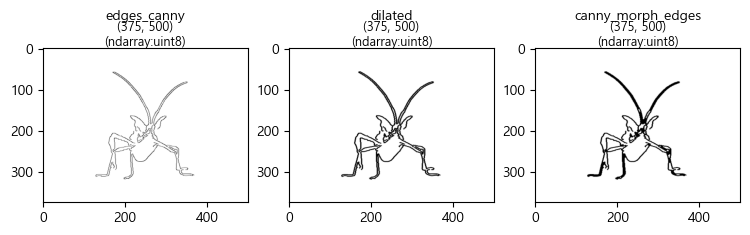

In [10]:
# Morph (형태학적 연산) 적용 canny edge 검출

# 1. 엣지 검출 (Canny)
edges = cv2.Canny(blurred, threshold1=canny_thr1, threshold2=canny_thr2)

# 2. 형태학적 연산을 위한 커널 생성
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# 3. 윤곽선 강조 (팽창 후 침식) : 윤곽선이 더 뚜렷해 지고, 끊어진 부분 연결
dilated = cv2.dilate(edges, kernel, iterations=1)
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# 4. 결과 출력
edges = cv2.resize(edges, (org_img_size[1], org_img_size[0]))
dilated = cv2.resize(dilated, (org_img_size[1], org_img_size[0]))
canny_morph_edges = cv2.resize(closed, (org_img_size[1], org_img_size[0]))

cannys.append(dilated)
canny_titles.append('morph_dilated')

cannys.append(canny_morph_edges)
canny_titles.append('morph_dilated_closed')


show_image([edges, dilated, canny_morph_edges], ['edges_canny', 'dilated', 'canny_morph_edges'], ['gray_r']*3)


blurred 값 범위: 0 ~ 255
enhanced by cv2.equalizeHist() 값 범위: 0 ~ 255
clahe enhanced 값 범위: 0 ~ 255
bilateralFilter 값 범위: 0 ~ 255
morph_dilated 값 범위: 0 ~ 255
morph_dilated_closed 값 범위: 0 ~ 255


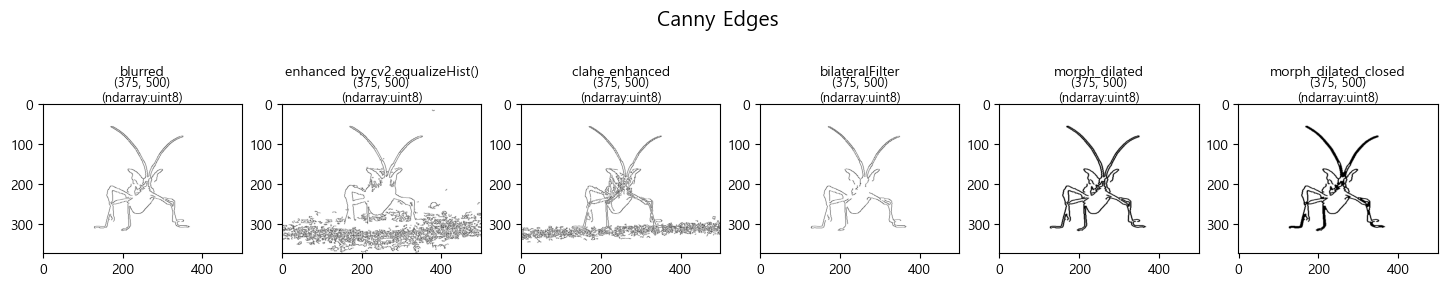

In [11]:
show_image(cannys, canny_titles, ['gray_r']*len(cannys), suptitle='Canny Edges', suptitle_top=0.72)

<hr>

- Laplacian edge 검출

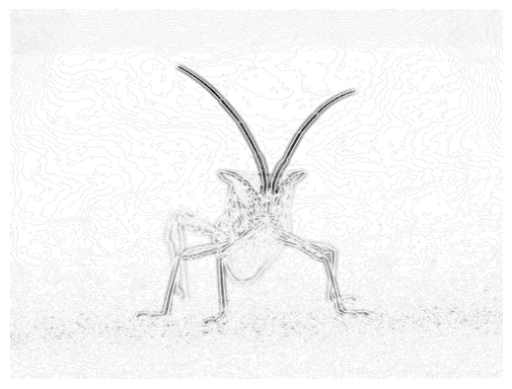

In [12]:
# Laplacian edge 검출(대안 방안)
# 노이즈 제거를 위한 가우시안 블러 적용
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)  # cv2.CV_64F: 출력 이미지의 깊이를 64비트 float로 설정 (고정밀도)
edges_laplacian = np.uint8(np.absolute(laplacian))

edges_laplacian = cv2.resize(edges_laplacian, (org_img_size[1], org_img_size[0]))

laplacians.append(edges_laplacian)
lap_titles.append('blurred')

plt.imshow(edges_laplacian, cmap='gray_r')
plt.axis('off');

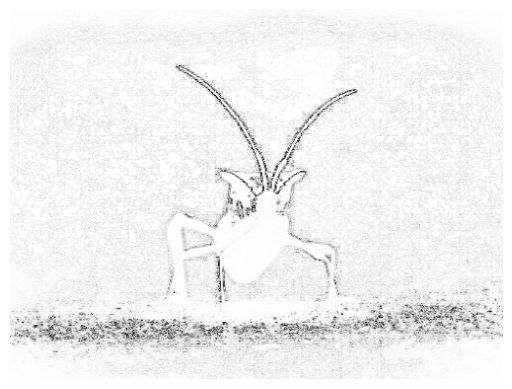

In [13]:
# 히스토그램 평활화 기반 Laplacian edge 검출
enhanced_equalHist = cv2.equalizeHist(img)

laplacian_e = cv2.Laplacian(enhanced_equalHist, cv2.CV_64F)  # cv2.CV_64F: 출력 이미지의 깊이를 64비트 float로 설정 (고정밀도)
edges_laplacian_e = np.uint8(np.absolute(laplacian_e))

edges_laplacian_e = cv2.resize(edges_laplacian_e, (org_img_size[1], org_img_size[0]))

laplacians.append(edges_laplacian_e)
lap_titles.append('enhanced by cv2.equalizedHist')

plt.imshow(edges_laplacian_e, cmap='gray_r')
plt.axis('off');

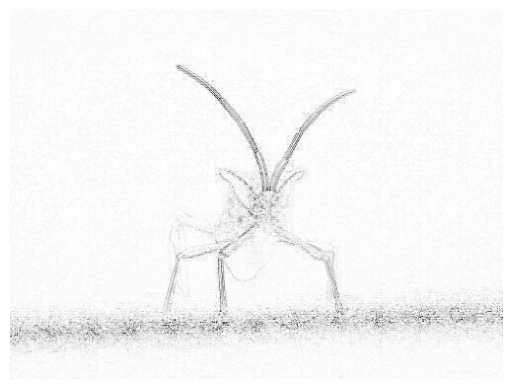

In [14]:
# 히스토그램 평활화 기반 Laplacian edge 검출
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
enhanced_clahe = clahe.apply(img)

laplacian_e = cv2.Laplacian(enhanced_clahe, cv2.CV_64F)  # cv2.CV_64F: 출력 이미지의 깊이를 64비트 float로 설정 (고정밀도)
edges_laplacian_e = np.uint8(np.absolute(laplacian_e))

edges_laplacian_e = cv2.resize(edges_laplacian_e, (org_img_size[1], org_img_size[0]))

laplacians.append(edges_laplacian_e)
lap_titles.append('chahe enhanced')

plt.imshow(edges_laplacian_e, cmap='gray_r')
plt.axis('off');

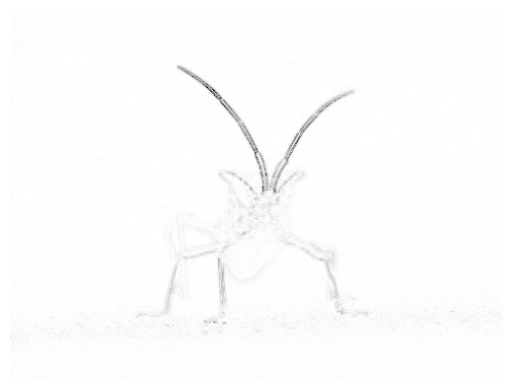

In [15]:
# 양방향 필터로 노이즈 제거하면서 Lapacian edge 추출

bilateral = cv2.bilateralFilter(img, d=5, sigmaColor=55, sigmaSpace=55)

laplacian_b = cv2.Laplacian(bilateral, cv2.CV_64F)  # cv2.CV_64F: 출력 이미지의 깊이를 64비트 float로 설정 (고정밀도)
edges_laplacian_b = np.uint8(np.absolute(laplacian_b))

edges_laplacian_b = cv2.resize(edges_laplacian_b, (org_img_size[1], org_img_size[0]))

laplacians.append(edges_laplacian_b)
lap_titles.append('bilateralFilter')

plt.imshow(edges_laplacian_b, cmap='gray_r')
plt.axis('off');

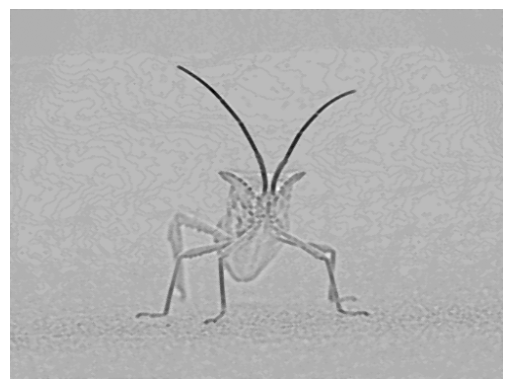

In [16]:
# Morph (형태학적 연산) 적용 Laplacian edge 검출

# 1. 엣지 검출 (Laplacian)
edges_l = cv2.Laplacian(blurred, cv2.CV_64F)  # cv2.CV_64F: 출력 이미지의 깊이를 64비트 float로 설정 (고정밀도)

# 2. 형태학적 연산을 위한 커널 생성
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# 3. 윤곽선 강조 (팽창 후 침식)
dilated = cv2.dilate(edges_l, kernel, iterations=1) 
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# 4. 결과 출력
dilated = cv2.resize(dilated, (org_img_size[1], org_img_size[0]))
closed = cv2.resize(closed, (org_img_size[1], org_img_size[0]))

laplacians.append(dilated)
lap_titles.append('morph_dilated')
laplacians.append(closed)
lap_titles.append('morph_dilated_closed')

plt.imshow(closed, cmap='gray_r')
plt.axis('off');

blurred 값 범위: 0 ~ 30
enhanced by cv2.equalizedHist 값 범위: 0 ~ 247
chahe enhanced 값 범위: 0 ~ 204
bilateralFilter 값 범위: 0 ~ 150
morph_dilated 값 범위: -13.83122666666672 ~ 32.95646933333335
morph_dilated_closed 값 범위: -12.0 ~ 32.97823466666667


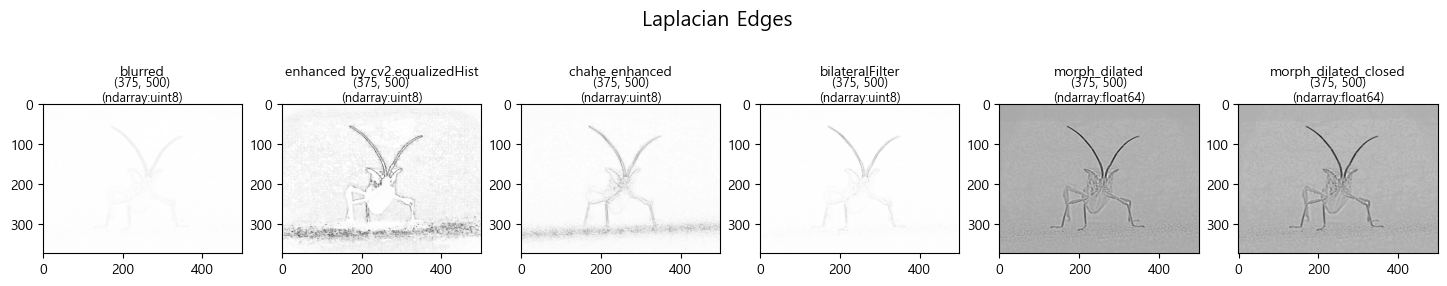

In [17]:
show_image(laplacians, lap_titles, ['gray_r']*len(laplacians), suptitle='Laplacian Edges', suptitle_top=0.72)


<hr>

- Sobel edge 검출

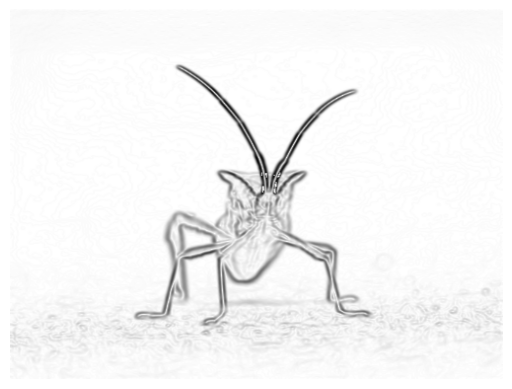

In [18]:
# Sobel edge 검출(대안 방안)
sobelx = cv2.Sobel(blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
sobely = cv2.Sobel(blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel = np.uint8(np.sqrt(sobelx**2 + sobely**2))

edges_sobel = cv2.resize(edges_sobel, (org_img_size[1], org_img_size[0]))

sobels.append(edges_sobel)
sobel_titles.append('blurred')

plt.imshow(edges_sobel, cmap='gray_r')
plt.axis('off');


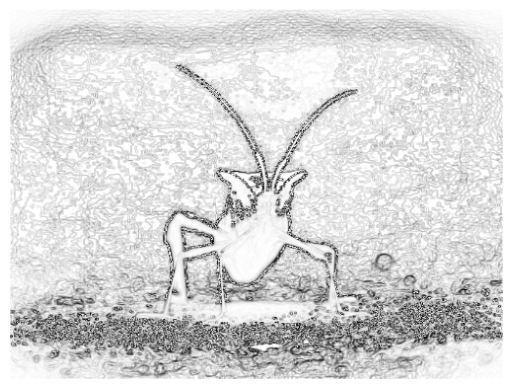

In [19]:
# 히스토그램 평활화 적용 Sobel edge 검출(대안 방안)
# 이미지 전체에 대한 평활화 기반
e_sobelx = cv2.Sobel(enhanced_equalHist, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
e_sobely = cv2.Sobel(enhanced_equalHist, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel_e = np.uint8(np.sqrt(e_sobelx**2 + e_sobely**2))

edges_sobel_e = cv2.resize(edges_sobel_e, (org_img_size[1], org_img_size[0]))

sobels.append(edges_sobel_e)
sobel_titles.append('enhanced by cv2.equalizeHist')

plt.imshow(edges_sobel_e, cmap='gray_r')
plt.axis('off');


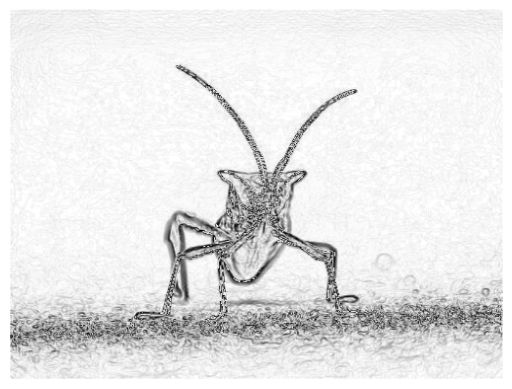

In [20]:
# 히스토그램 평활화 적용 Sobel edge 검출(대안 방안)
# tile 단위의 평활화 기반
e_sobelx = cv2.Sobel(enhanced_clahe, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
e_sobely = cv2.Sobel(enhanced_clahe, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel_e = np.uint8(np.sqrt(e_sobelx**2 + e_sobely**2))

edges_sobel_e = cv2.resize(edges_sobel_e, (org_img_size[1], org_img_size[0]))

sobels.append(edges_sobel_e)
sobel_titles.append('clahe enhanced')

plt.imshow(edges_sobel_e, cmap='gray_r')
plt.axis('off');


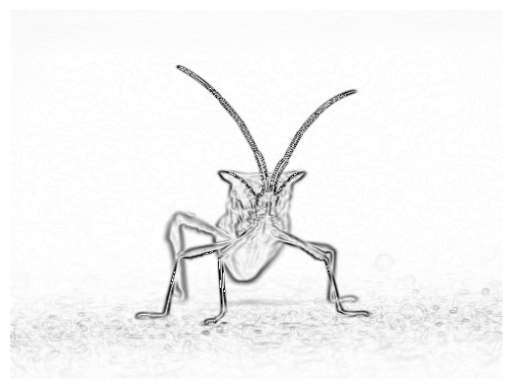

In [21]:
# 양방향 필터 적용 노이즈 제거 기반 Sobel edge 검출(대안 방안)
b_sobelx = cv2.Sobel(bilateral, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
b_sobely = cv2.Sobel(bilateral, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel_b = np.uint8(np.sqrt(b_sobelx**2 + b_sobely**2))

edges_sobel_b = cv2.resize(edges_sobel_b, (org_img_size[1], org_img_size[0]))

sobels.append(edges_sobel_b)
sobel_titles.append('bilateralFilter')

plt.imshow(edges_sobel_b, cmap='gray_r')
plt.axis('off');

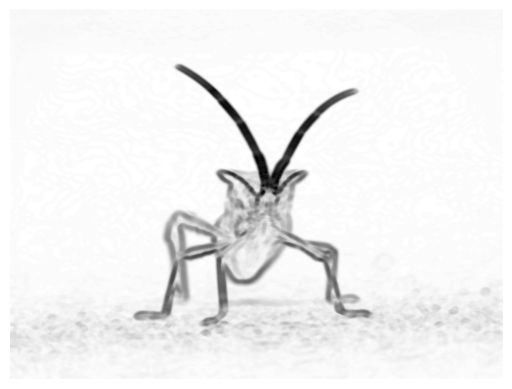

In [22]:
# Morph (형태학적 연산) 적용 Sobel edge 검출

# 1. 엣지 검출 (Sobel)
g_sobelx = cv2.Sobel(blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
g_sobely = cv2.Sobel(blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel_m = np.uint8(np.sqrt(g_sobelx**2 + g_sobely**2))

# 2. 형태학적 연산을 위한 커널 생성
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# 3. 윤곽선 강조 (팽창 후 침식)
dilated = cv2.dilate(edges_sobel_m, kernel, iterations=1)
closed = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, kernel)

# 4. 결과 출력
dilated = cv2.resize(dilated, (org_img_size[1], org_img_size[0]))
sobel_morph_edges = cv2.resize(closed, (org_img_size[1], org_img_size[0]))

sobels.append(dilated)
sobel_titles.append('morph_dilated')
sobels.append(sobel_morph_edges)
sobel_titles.append('morph_dilated_closed')

plt.imshow(sobel_morph_edges, cmap='gray_r')
plt.axis('off');

blurred 값 범위: 0 ~ 253
enhanced by cv2.equalizeHist 값 범위: 0 ~ 252
clahe enhanced 값 범위: 0 ~ 250
bilateralFilter 값 범위: 0 ~ 250
morph_dilated 값 범위: 0 ~ 254
morph_dilated_closed 값 범위: 0 ~ 254


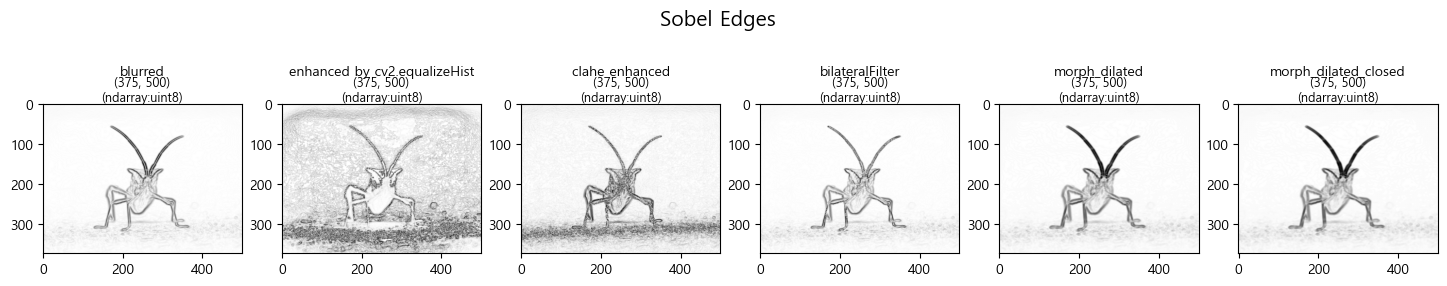

In [23]:
show_image(sobels, sobel_titles, ['gray_r']*len(sobels), suptitle='Sobel Edges', suptitle_top=0.72)


# 정리

1. Canny Edge Detection 

    - 이중 임계값 설정으로 깔끔하고 연속적인 윤곽선 검출에 효과적
    - 객체의 외곽선 추출에 적합

2. Laplacian Edge Detection

    - 이미지의 2차 미분을 이용한 엣지 검출
    - 방향성 없는 모든 방향의 변화 감지
    - 노이즈에 민감하지만, 질감이나 미세한 변화도 포착 가능
    - 텍스처 분석이나 세부 구조 파악에 적합

3. Sobel Edge Detection

    - 이미지의 강도 변화(gradient)를 이용한 엣지 검출. 즉, laplacian edge와는 다르게 일차 미분 이용
    - 수평/수직 방향의 변화 강조
    - 질감이나 텍스터의 흐름을 어느 정도 유지
    - 엣지가 두껍고, 질감이 일부 유지됨
    - 표면의 방향성이나 패턴 분석에 유리
    

[참고] [A Comprehensive Analysis of Image Edge Detection Techniques](https://gvpress.com/journals/IJMUE/vol12_no11/1.pdf)

<hr>

# 로그 변환

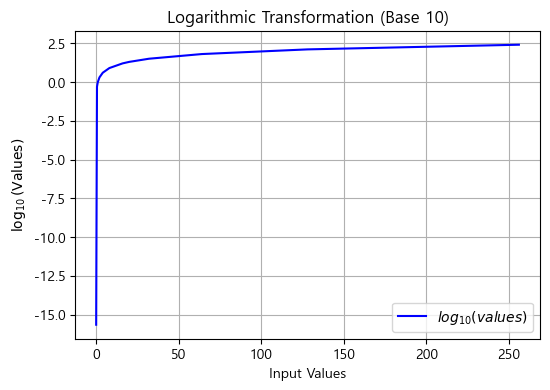

2.220446049250313e-16 -(log)-> -15.653559774527022
0.5 -(log)-> -0.3010299956639812
  1 -(log)-> 0.0
  2 -(log)-> 0.3010299956639812
  4 -(log)-> 0.6020599913279624
  8 -(log)-> 0.9030899869919435
 16 -(log)-> 1.2041199826559248
 20 -(log)-> 1.3010299956639813
 32 -(log)-> 1.505149978319906
 64 -(log)-> 1.806179973983887
128 -(log)-> 2.1072099696478683
256 -(log)-> 2.4082399653118496


In [24]:
# 값 준비
eps = np.finfo(float).eps
values = np.linspace(eps, 256, 100)
values = [eps, 0.5, 1,2,4,8,16, 20, 32,64,128,256]
log_values = [np.log10(v).item() for v in values]

# 시각화
plt.figure(figsize=(6, 4))
plt.plot(values, log_values, label=r'$log_{10}(values)$', color='blue')

# 축 라벨 및 제목
plt.xlabel('Input Values')
plt.ylabel(r'$\log_{10}(\mathrm{Values})$')

plt.title('Logarithmic Transformation (Base 10)')
plt.grid(True)
plt.legend()

# 그래프 출력
plt.show()

print("\n".join(f"{str(iv):>3} -(log)-> {str(v)}" for iv, v in zip(values, log_values)))

In [25]:
# 로그 변환

def log_transform(img_):
    c = 255 / np.log(1. + np.max(img_))   # log(0)은 수학적으로 계산 불능이므로 0이 되지 않도록 1을 더함.
    log_transformed = c * np.log(1. + img_)

    # 0 ~ 255 범위로 정규화
    log_transformed = np.array(log_transformed, dtype=np.uint8)

    return log_transformed

img 값 범위: 0 ~ 217
log_transformed 값 범위: 0 ~ 255
edges_sobel_log 값 범위: 0 ~ 255
edges_sobel_blur 값 범위: 0 ~ 255


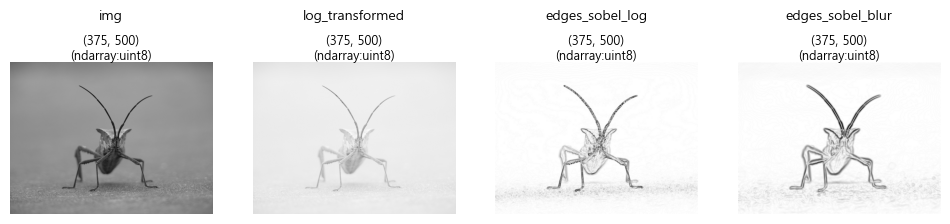

In [26]:
# log 변환한 이미지를 기반으로 Sobel edge 검출
img = cv2.imread('stinkbug.png', cv2.IMREAD_GRAYSCALE)
#img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

log_transformed = log_transform(img)

log_sobelx = cv2.Sobel(log_transformed, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
log_sobely = cv2.Sobel(log_transformed, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel_log = np.uint8(np.sqrt(log_sobelx**2 + log_sobely**2))

# 노이즈 제거를 위한 가우시안 블러 적용
kernel_size = (7,7)
g_blurred = cv2.GaussianBlur(img, ksize=kernel_size, sigmaX=0)  # 가우시안 커널의 x축 방향(가로 방향)으로의 블러링 강도 조절. sigmX값이 클수록 블러징 정도가 강해짐.

# Sobel edge 검출(대안 방안)
g_sobelx = cv2.Sobel(g_blurred, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)
g_sobely = cv2.Sobel(g_blurred, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
edges_sobel_blur = np.uint8(np.sqrt(g_sobelx**2 + g_sobely**2))

imgs = [img, log_transformed, edges_sobel_log, edges_sobel_blur]
titles =['img', 'log_transformed', 'edges_sobel_log', 'edges_sobel_blur']
cmaps = ['gray', 'gray', 'gray_r', 'gray_r']

show_image(imgs, titles, cmaps, ax_off=True, pad=20)

<hr>

# 고주파 성분 추출 및 이진화를 통한 윤곽선 추출 과정

- 기본적으로 cv2.Laplacian()이나 cv2.Sobel() 같은 함수는 고주파 성분을 강조하는 필터링 기법을 사용하여 윤곽선을 추출하는 것임.

    - 두 함수 모두 미분 기반 필터로, 이미지의 밝기 변화를 계산해 윤곽선을 추출하는 방식

working_img 값 범위: 18 ~ 203
equalized(노이즈 강조) 값 범위: 0 ~ 255
blurred(저주파 제거) 값 범위: 1 ~ 253
detail
(고주파성분 -> 윤곽선) 값 범위: 0 ~ 205
edge_mask(이진화로 경계 강조) 값 범위: 0 ~ 255


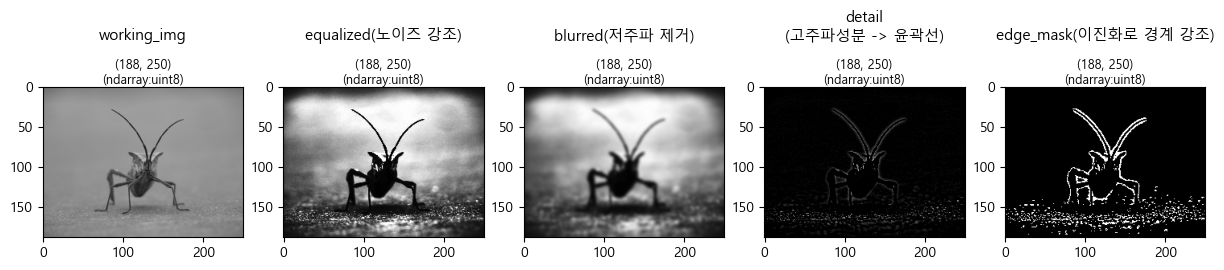

working_img 값 범위: 18 ~ 203
equalized(노이즈 강조) 값 범위: 0 ~ 255
blurred(저주파 제거) 값 범위: 1 ~ 253
detail
(고주파성분 -> 윤곽선) 값 범위: 0 ~ 205
edge_mask(이진화로 경계 강조) 값 범위: 0 ~ 255


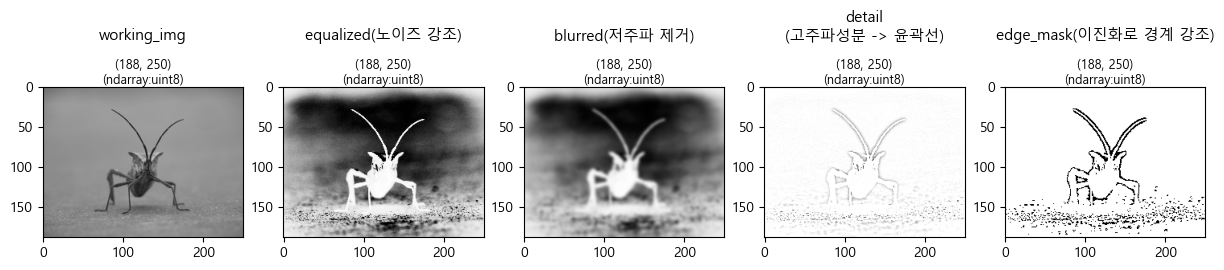

In [29]:
### 윤곽선 추출 ###
"""  
# 히스토그램 평활화로 대비 향상 -> 저주파 노이즈 제거 -> 이진화 ==> 달 윤곽선 추출
"""

img_org = cv2.imread('stinkbug.png', cv2.IMREAD_COLOR_RGB)
img = cv2.resize(img_org, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)  # resize를 할 때와 하지 않을 때 추출한 윤곽선의 품질이 어떻게 달라지는 지도 확인!!
working_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 

equalized = cv2.equalizeHist(working_img)            # 명암이 치우쳐져 있을 경우, 밝기와 대비를 전체적으로 고르게 조정해서 노이즈를 더 잘 드러나게 만들 수 있음
blurred = cv2.GaussianBlur(equalized, (9,9), 0)      # 이미지에서 고주파 성분 억제 -> 저주파 성분만 남김
detail = cv2.subtract(equalized, blurred)            # 이미지에서 저주파 성분을 차감하여 고주파 성분만 남기고, 이 상태에서 윤곽선 검출

# 추출된 경계선을 강조하기 위해 이진화 적용
_, edge_mask = cv2.threshold(detail, 25, 255, cv2.THRESH_BINARY)

imgs = [working_img, equalized, blurred, detail, edge_mask]
titles = ['working_img', 'equalized(노이즈 강조)', 'blurred(저주파 제거)', f'detail\n(고주파성분 -> 윤곽선)', 'edge_mask(이진화로 경계 강조)']
show_image(imgs, titles, ['gray']*len(imgs), pad=20, fontsize=11)  
show_image(imgs, titles, ['gray', 'gray_r', 'gray_r', 'gray_r', 'gray_r'], pad=20, fontsize=11)  

In [ ]:
# opencv-python-headless: GUI 기능이 없는 경량 버전
print(cv2.getBuildInformation())


General configuration for OpenCV 4.12.0 =====================================
  Version control:               4.12.0

  Platform:
    Timestamp:                   2025-07-04T16:42:50Z
    Host:                        Windows 10.0.26100 AMD64
    CMake:                       3.24.2
    CMake generator:             Visual Studio 17 2022
    CMake build tool:            C:/Program Files/Microsoft Visual Studio/2022/Enterprise/MSBuild/Current/Bin/amd64/MSBuild.exe
    MSVC:                        1944
    Configuration:               Debug Release
    Algorithm Hint:              ALGO_HINT_ACCURATE

  CPU/HW features:
    Baseline:                    SSE SSE2 SSE3
      requested:                 SSE3
    Dispatched code generation:  SSE4_1 SSE4_2 AVX FP16 AVX2 AVX512_SKX
      SSE4_1 (17 files):         + SSSE3 SSE4_1
      SSE4_2 (1 files):          + SSSE3 SSE4_1 POPCNT SSE4_2
      AVX (9 files):             + SSSE3 SSE4_1 POPCNT SSE4_2 AVX
      FP16 (0 files):            + SSSE3 SS

In [ ]:
# open-cv가 GUI 기능을 지원하지 않는 경량 버전(opencv-python-headless)이 설치된 경우, 아래 코드 실행시 오류 발생

# 이 경우 GUI를 사용하고 싶다면, pip uninstall opencv-python-headless를 실행 한 후 pip install opencv-python으로 다시 설치
# 하지만, 이렇게 재설치를 하면, 경우에 따라서는 다른 라이브러리와 맞춰 두었던 의존성이 깨지는 문제가 발생할 수도 있으므로,
# 반드시 cv2.imshow()를 써야 하는 것이 아니라면, matplotlib.pyplot을 이용한 plt.imshow()를 사용하는 것도 한 가지 방법!

cv2.imshow('img', img_org)
key = cv2.waitKey(0)       #  사용자가 특정 키를 누를 때까지 대기
print(f"key: {key}")
cv2.destroyAllWindows()

"""
    ---------------------------------------------------------------------------
error                                     Traceback (most recent call last)
Cell In[28], line 1
----> 1 cv2.imshow('img', img_org)
      2 key = cv2.waitKey(0)
      3 print(f"key: {key}")

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
    
"""